# Conexão com postgres e importação de

## Instalando bibliotecas de acesso ao postgres, manipulação de dados e gráficos

In [ ]:
!pip install sqlalchemy

### Importando bibliotecas

In [ ]:
import psycopg2
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Usando psycopg2 para configurar conexão

In [ ]:
db_config = {'host':  'pg-20dc39ce-larissabatistarangel.k.aivencloud.com',
                           'user' : 'avnadmin',
                           'password' : 'AVNS_iBcVxpX-mQhYYwXZVSy',
                           'port' : '16523',
                           'database' : 'defaultdb'}

conn = psycopg2.connect(**db_config)

# Relatórios



## Relatório 1: Exames realizados por paciente.

### Objetivo: Obter um relatório que mostre o nome de cada paciente e a quantidade total de exames realizados por ele.
Código para obtenção do resultado:

In [ ]:
res = pd.read_sql_query("""
SELECT
    nome,
    count(exame.fk_paciente_codigo) as qtd_exames
FROM paciente
JOIN exame ON exame.fk_paciente_codigo = paciente.codigo
GROUP BY paciente.nome
""",conn)

res

<ipython-input-23-e77dacddea47>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res = pd.read_sql_query("""


,nome,qtd_exames
0,Marcelo Rossi,1
1,Bart Simpson,1
2,Don Quixote,1
3,Homer Simpson,1
4,Edgar Allan Poe,1
5,Franz Kafka,1
6,Chewbacca,1
7,Smeagol,1
8,Shrek,1
9,Bola de Neve,1


<ipython-input-59-d5ab0b7a3717>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='nome', y='qtd_exames', data=res, palette=colors)
<ipython-input-59-d5ab0b7a3717>:3: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x='nome', y='qtd_exames', data=res, palette=colors)


<Axes: xlabel='nome', ylabel='qtd_exames'>

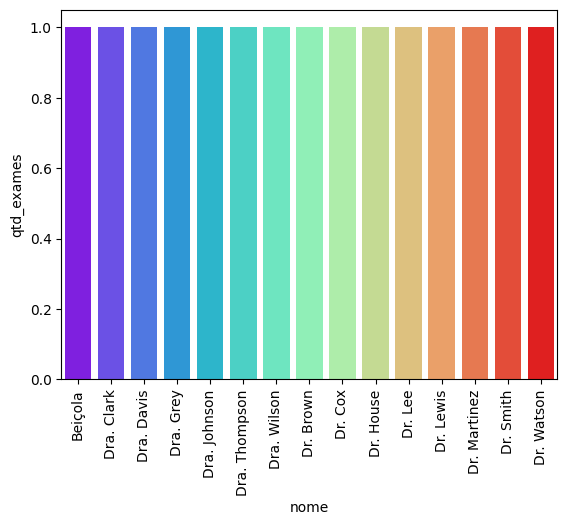

In [ ]:
plt.xticks(rotation=90)
colors = plt.cm.rainbow(np.linspace(0, 1, len(res)))
sns.barplot(x='nome', y='qtd_exames', data=res, palette=colors)

# ==========================================================================================
## Relatório 2: Frequência de cada patologia.
### Objetivo: Identificar a quantidade de ocorrências de cada patologia.
Código para obtenção do resultado:

In [ ]:
res = pd.read_sql_query("""
SELECT
    nome,
    count(patologia_laudo.fk_patologia_codigo) as frequencia
FROM PATOLOGIA_LAUDO
JOIN patologia ON patologia.codigo = patologia_laudo.fk_patologia_codigo
GROUP BY patologia.nome
ORDER BY frequencia DESC
                            """,conn)
res

<ipython-input-61-ac8032c286d6>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res = pd.read_sql_query("""


,nome,frequencia
0,Diabetes Tipo 1,4
1,Hipertensão Arterial,4
2,Asma,4
3,Diabetes Tipo 2,4
4,Hepatite Viral,4
5,Apendicite,4
6,Fratura de Fêmur,3
7,Infecção Urinária,3
8,Doença Arterial Coronariana,3
9,Pneumonia,3


<ipython-input-62-a84e5e761d7d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='nome', y='frequencia', data=res, palette=colors)
<ipython-input-62-a84e5e761d7d>:3: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x='nome', y='frequencia', data=res, palette=colors)


<Axes: xlabel='nome', ylabel='frequencia'>

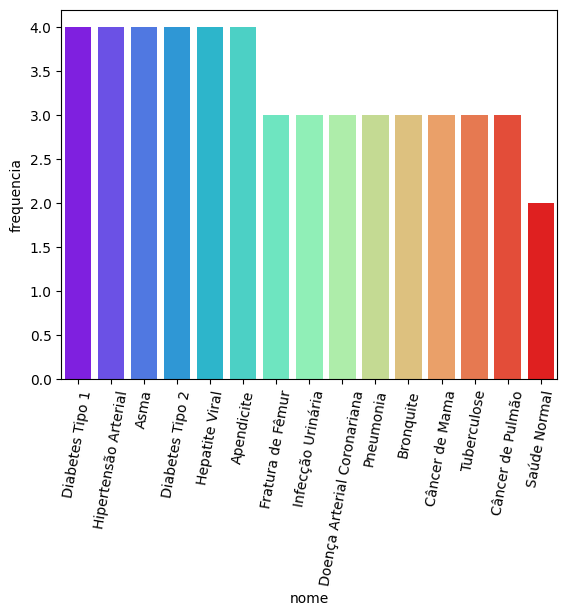

In [ ]:
plt.xticks(rotation=80)
colors = plt.cm.rainbow(np.linspace(0, 1, len(res)))
sns.barplot(x='nome', y='frequencia', data=res, palette=colors)

# ============================================================
## Relatório 3: Radiologistas e seus exames realizados.
### Objetivo: Listar cada radiologista e a quantidade total de exames realizados por ele.
Código para obtenção do resultado:

In [ ]:
res = pd.read_sql_query("""
SELECT
    nome,
    count(laudo.fk_radiologista_codigo) as qtd_exames
FROM laudo
JOIN radiologista ON radiologista.codigo = laudo.fk_radiologista_codigo
GROUP BY radiologista.nome
ORDER BY nome
                  """,conn)

res

<ipython-input-64-d1688477551e>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res = pd.read_sql_query("""


,nome,qtd_exames
0,Beiçola,1
1,Dra. Clark,1
2,Dra. Davis,1
3,Dra. Grey,1
4,Dra. Johnson,1
5,Dra. Thompson,1
6,Dra. Wilson,1
7,Dr. Brown,1
8,Dr. Cox,1
9,Dr. House,1


<ipython-input-65-88923348c153>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='nome', y='qtd_exames', data=res, palette=colors)
<ipython-input-65-88923348c153>:3: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x='nome', y='qtd_exames', data=res, palette=colors)


<Axes: xlabel='nome', ylabel='qtd_exames'>

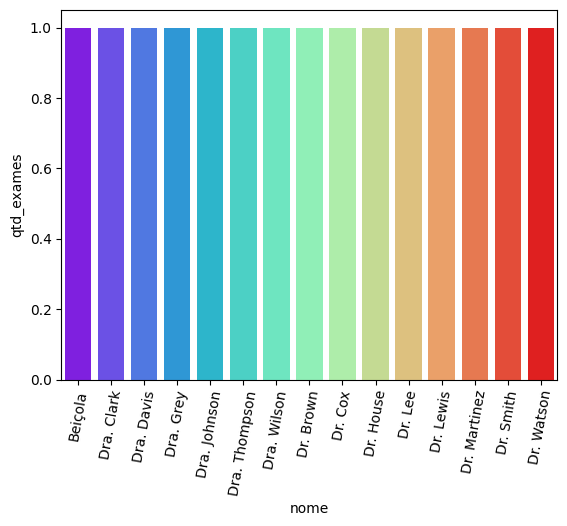

In [ ]:
plt.xticks(rotation=80)
colors = plt.cm.rainbow(np.linspace(0, 1, len(res)))
sns.barplot(x='nome', y='qtd_exames', data=res, palette=colors)

# ============================================================
## Relatório 4: Média de confiabilidade das predições por patologia.
### Objetivo: média de confiabilidade das predições para cada patologia.
Código para obtenção do resultado:

In [ ]:
res = pd.read_sql_query("""
SELECT
    p.nome AS patologia,
    AVG(pr.confiabilidade) AS media_confiabilidade
FROM
    PATOLOGIA p
JOIN
    PREDICAO pr ON p.codigo = pr.fk_patologia_codigo
GROUP BY
    p.nome
ORDER BY
    media_confiabilidade DESC;
                            """,conn)

res

<ipython-input-66-230b68552c20>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res = pd.read_sql_query("""


,patologia,media_confiabilidade
0,Pneumonia,0.898125
1,Saúde Normal,0.817647
2,Bronquite,0.745294


<ipython-input-69-de73c736cd66>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='patologia', y='media_confiabilidade', data=res, palette=colors)
<ipython-input-69-de73c736cd66>:3: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x='patologia', y='media_confiabilidade', data=res, palette=colors)


<Axes: xlabel='patologia', ylabel='media_confiabilidade'>

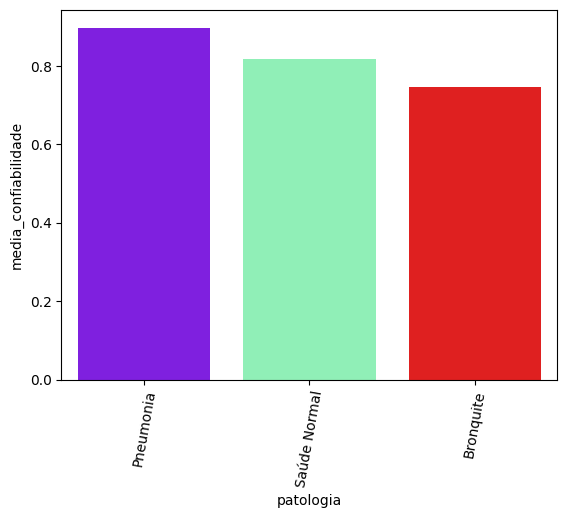

In [ ]:
plt.xticks(rotation=80)
colors = plt.cm.rainbow(np.linspace(0, 1, len(res)))
sns.barplot(x='patologia', y='media_confiabilidade', data=res, palette=colors)

# ============================================================
## Relatório 5: Frequência de exames por aparelho.
### Objetivo: Determinar a quantidade de exames realizados por cada tipo de aparelho para avaliar a frequência de uso e identificar quais equipamentos são mais requisitados.
Código para obtenção do resultado:

In [ ]:
res = pd.read_sql_query("""
SELECT
    a.marca AS aparelho,
    COUNT(e.codigo) AS total_exames
FROM APARELHO a
JOIN EXAME e ON a.codigo = e.fk_aparelho_codigo
GROUP BY a.marca
ORDER BY total_exames DESC;""",conn)
res

<ipython-input-31-15b1aecd3269>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res = pd.read_sql_query("""


,aparelho,total_exames
0,Hitachi,2
1,Siemens,2
2,Canon,2
3,Samsung,2
4,Fujifilm,2
5,GE Healthcare,2
6,Toshiba,2
7,Philips,1


<ipython-input-72-5caf7852caa4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='aparelho', y='total_exames', data=res, palette=colors)
<ipython-input-72-5caf7852caa4>:3: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x='aparelho', y='total_exames', data=res, palette=colors)


<Axes: xlabel='aparelho', ylabel='total_exames'>

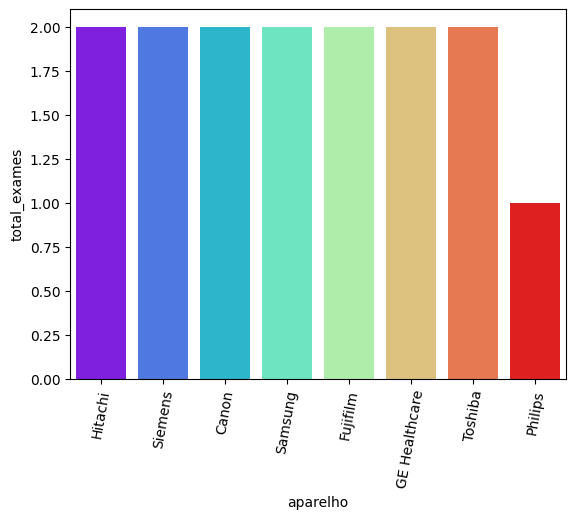

In [ ]:
plt.xticks(rotation=80)
colors = plt.cm.rainbow(np.linspace(0, 1, len(res)))
sns.barplot(x='aparelho', y='total_exames', data=res, palette=colors)